<a href="https://colab.research.google.com/github/roshank1605A04/SECOM-Detecting-Defected-Items/blob/master/SECOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting the drive on colabs**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Semi Conductor  Manufacturing Data Set**

  The SECOM (Semiconductor Manufacturing) dataset, consists of manufacturing operation data and the semiconductor quality data. It contains 1567 observations taken from a wafer fabrication production line. Each observation is a vector of 590 sensor measurements plus a label of pass/fail test. Also, there are only 104 fail cases which are labeled as positive (encoded as 1), whereas much larger amount of examples pass the test and are labeled as negative (encoded as -1). This is a 1:14 proportion. In this work not only a feature selection method for extracting the post discriminative sensors is proposed, but also boosting and data generation techniques are devised to deal with highly imbalance between the pass and fail cases. 

In [0]:
!ls 'drive/My Drive/Projects/practice/SECOM/secom.csv'

'drive/My Drive/Projects/practice/SECOM/secom.csv'


**Importing basic Libraries**

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [0]:
data = pd.read_csv('drive/My Drive/Projects/practice/SECOM/secom.csv')

print(data.shape)

(1567, 592)


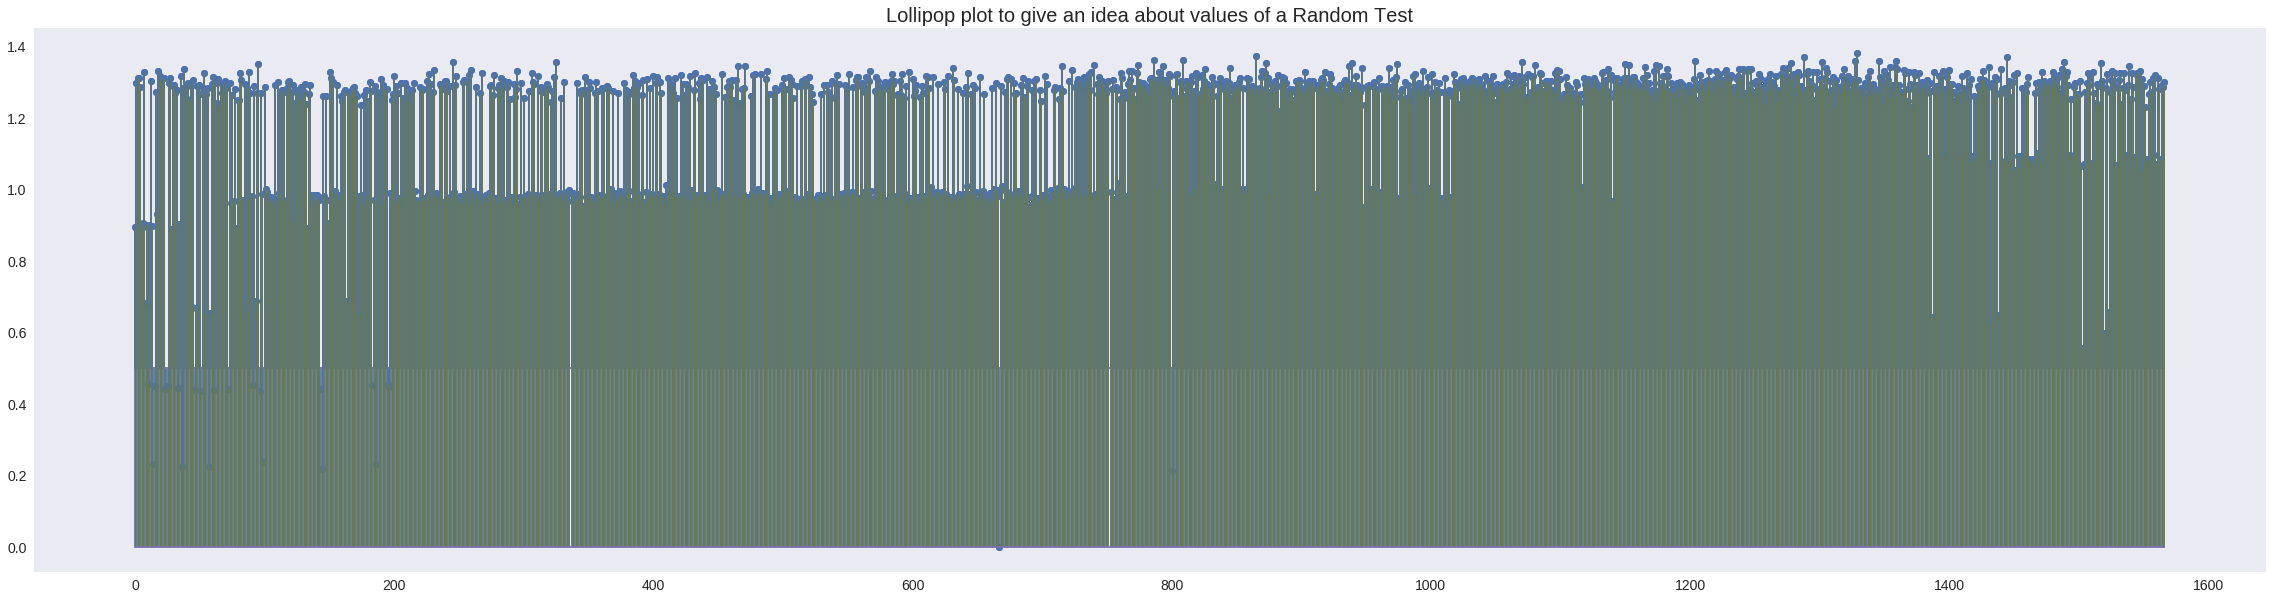

In [0]:
# create data
values = data['25']
 
plt.rcParams['figure.figsize'] = (40, 10)  
# position is customized with the bottom argument
plt.stem(values, markerfmt=' ', bottom=0.5)

# note that this works as well
plt.stem(values, basefmt=" ")
 
plt.title('Lollipop plot to give an idea about values of a Random Test', fontsize = 20)
(markers, stemlines, baseline) = plt.stem(values)
plt.setp(stemlines, linestyle="-", color="olive", linewidth=0.5 )  
plt.show()

**Exploratory Data Analysis**

In [0]:
data.sample(5)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
134,2008-06-08 12:33:00,3020.46,2477.86,2242.2444,1695.7049,1.4215,100.0,99.9944,0.1215,1.4845,...,NaN,0.5002,0.0138,0.0030,2.7605,0.0058,0.0169,0.0060,289.9234,-1
491,2008-08-28 18:25:00,2934.01,2461.28,2168.7222,1212.1040,1.5175,100.0,106.7589,0.1233,1.3322,...,NaN,0.5039,0.0113,0.0033,2.2429,0.0279,0.0335,0.0115,119.9899,-1
748,2008-07-09 20:12:00,3083.62,2728.28,2203.4556,1441.1445,0.8264,100.0,104.6767,0.1232,1.5160,...,NaN,0.4974,0.0104,0.0026,2.0921,0.0419,0.0098,0.0032,23.3852,-1
696,2008-02-09 16:58:00,3046.63,2440.05,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.4063,...,NaN,0.4993,0.0120,0.0033,2.4057,0.0123,0.0129,0.0042,104.7519,-1
1265,2008-03-10 04:49:00,3028.40,2485.82,2173.4889,1145.7970,0.9402,100.0,104.0556,0.1247,1.3089,...,NaN,0.5044,0.0166,0.0043,3.2817,-0.0047,0.0134,0.0035,286.1303,-1


In [0]:
data.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [0]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [0]:
data.isnull().any().any()

True

In [0]:

# Replacing all the NaN values with 0 as the values correspond to the test results.
# since, the values are not present that means the values are not available or calculated
# so better we not take median or mean and replace them with zeros

data = data.replace(np.NaN, 0)
data.isnull().any().any()

False

**Data Visualization**

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


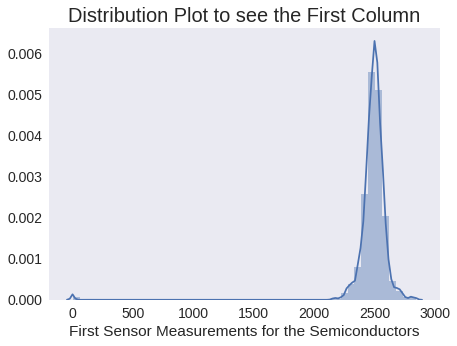

In [0]:
# distribution plot to see the range of value in the second column

plt.rcParams['figure.figsize'] = (7, 5)
sns.distplot(data['1'])
plt.title('Distribution Plot to see the First Column', fontsize = 20)
plt.xlabel('First Sensor Measurements for the Semiconductors')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


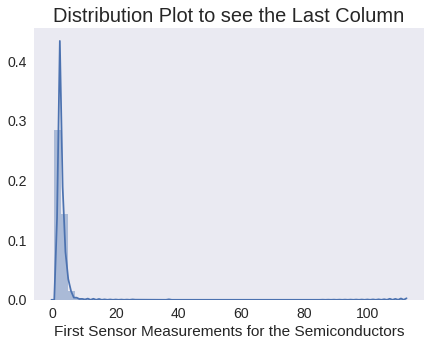

In [0]:
# distribution plot to see the range of value in the second column

plt.rcParams['figure.figsize'] = (7, 5)
sns.distplot(data['520'])
plt.title('Distribution Plot to see the Last Column', fontsize = 20)
plt.xlabel('First Sensor Measurements for the Semiconductors')
plt.show()

In [0]:
data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

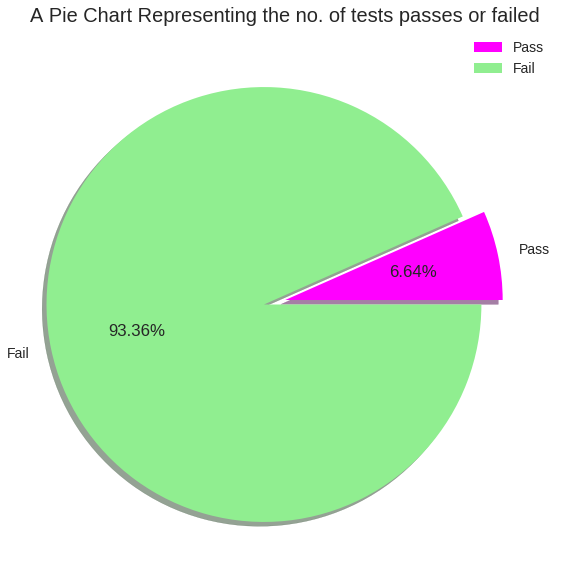

In [0]:
# pie chart

labels = ['Pass', 'Fail']
size = [104, 1463]
colors = ['magenta', 'lightgreen']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('A Pie Chart Representing the no. of tests passes or failed', fontsize = 20)
plt.legend()
plt.show()

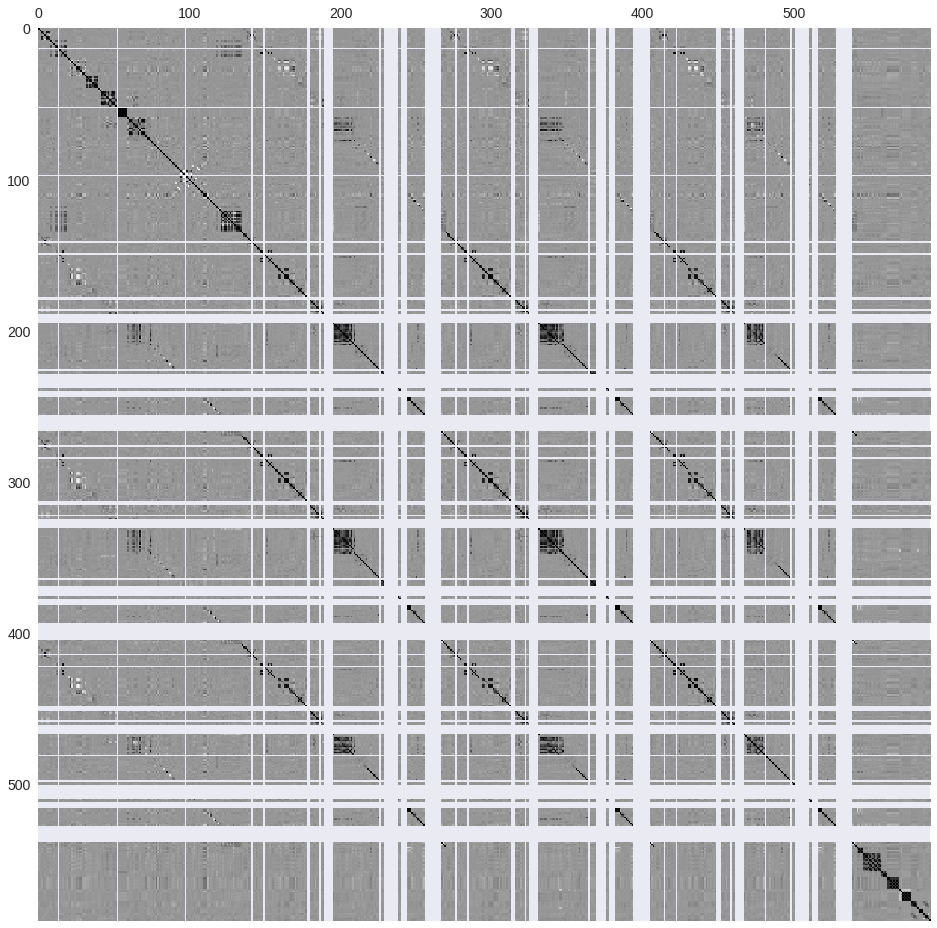

In [0]:
# matplot 

plt.rcParams['figure.figsize'] = (25, 25)
plt.matshow(data.corr())

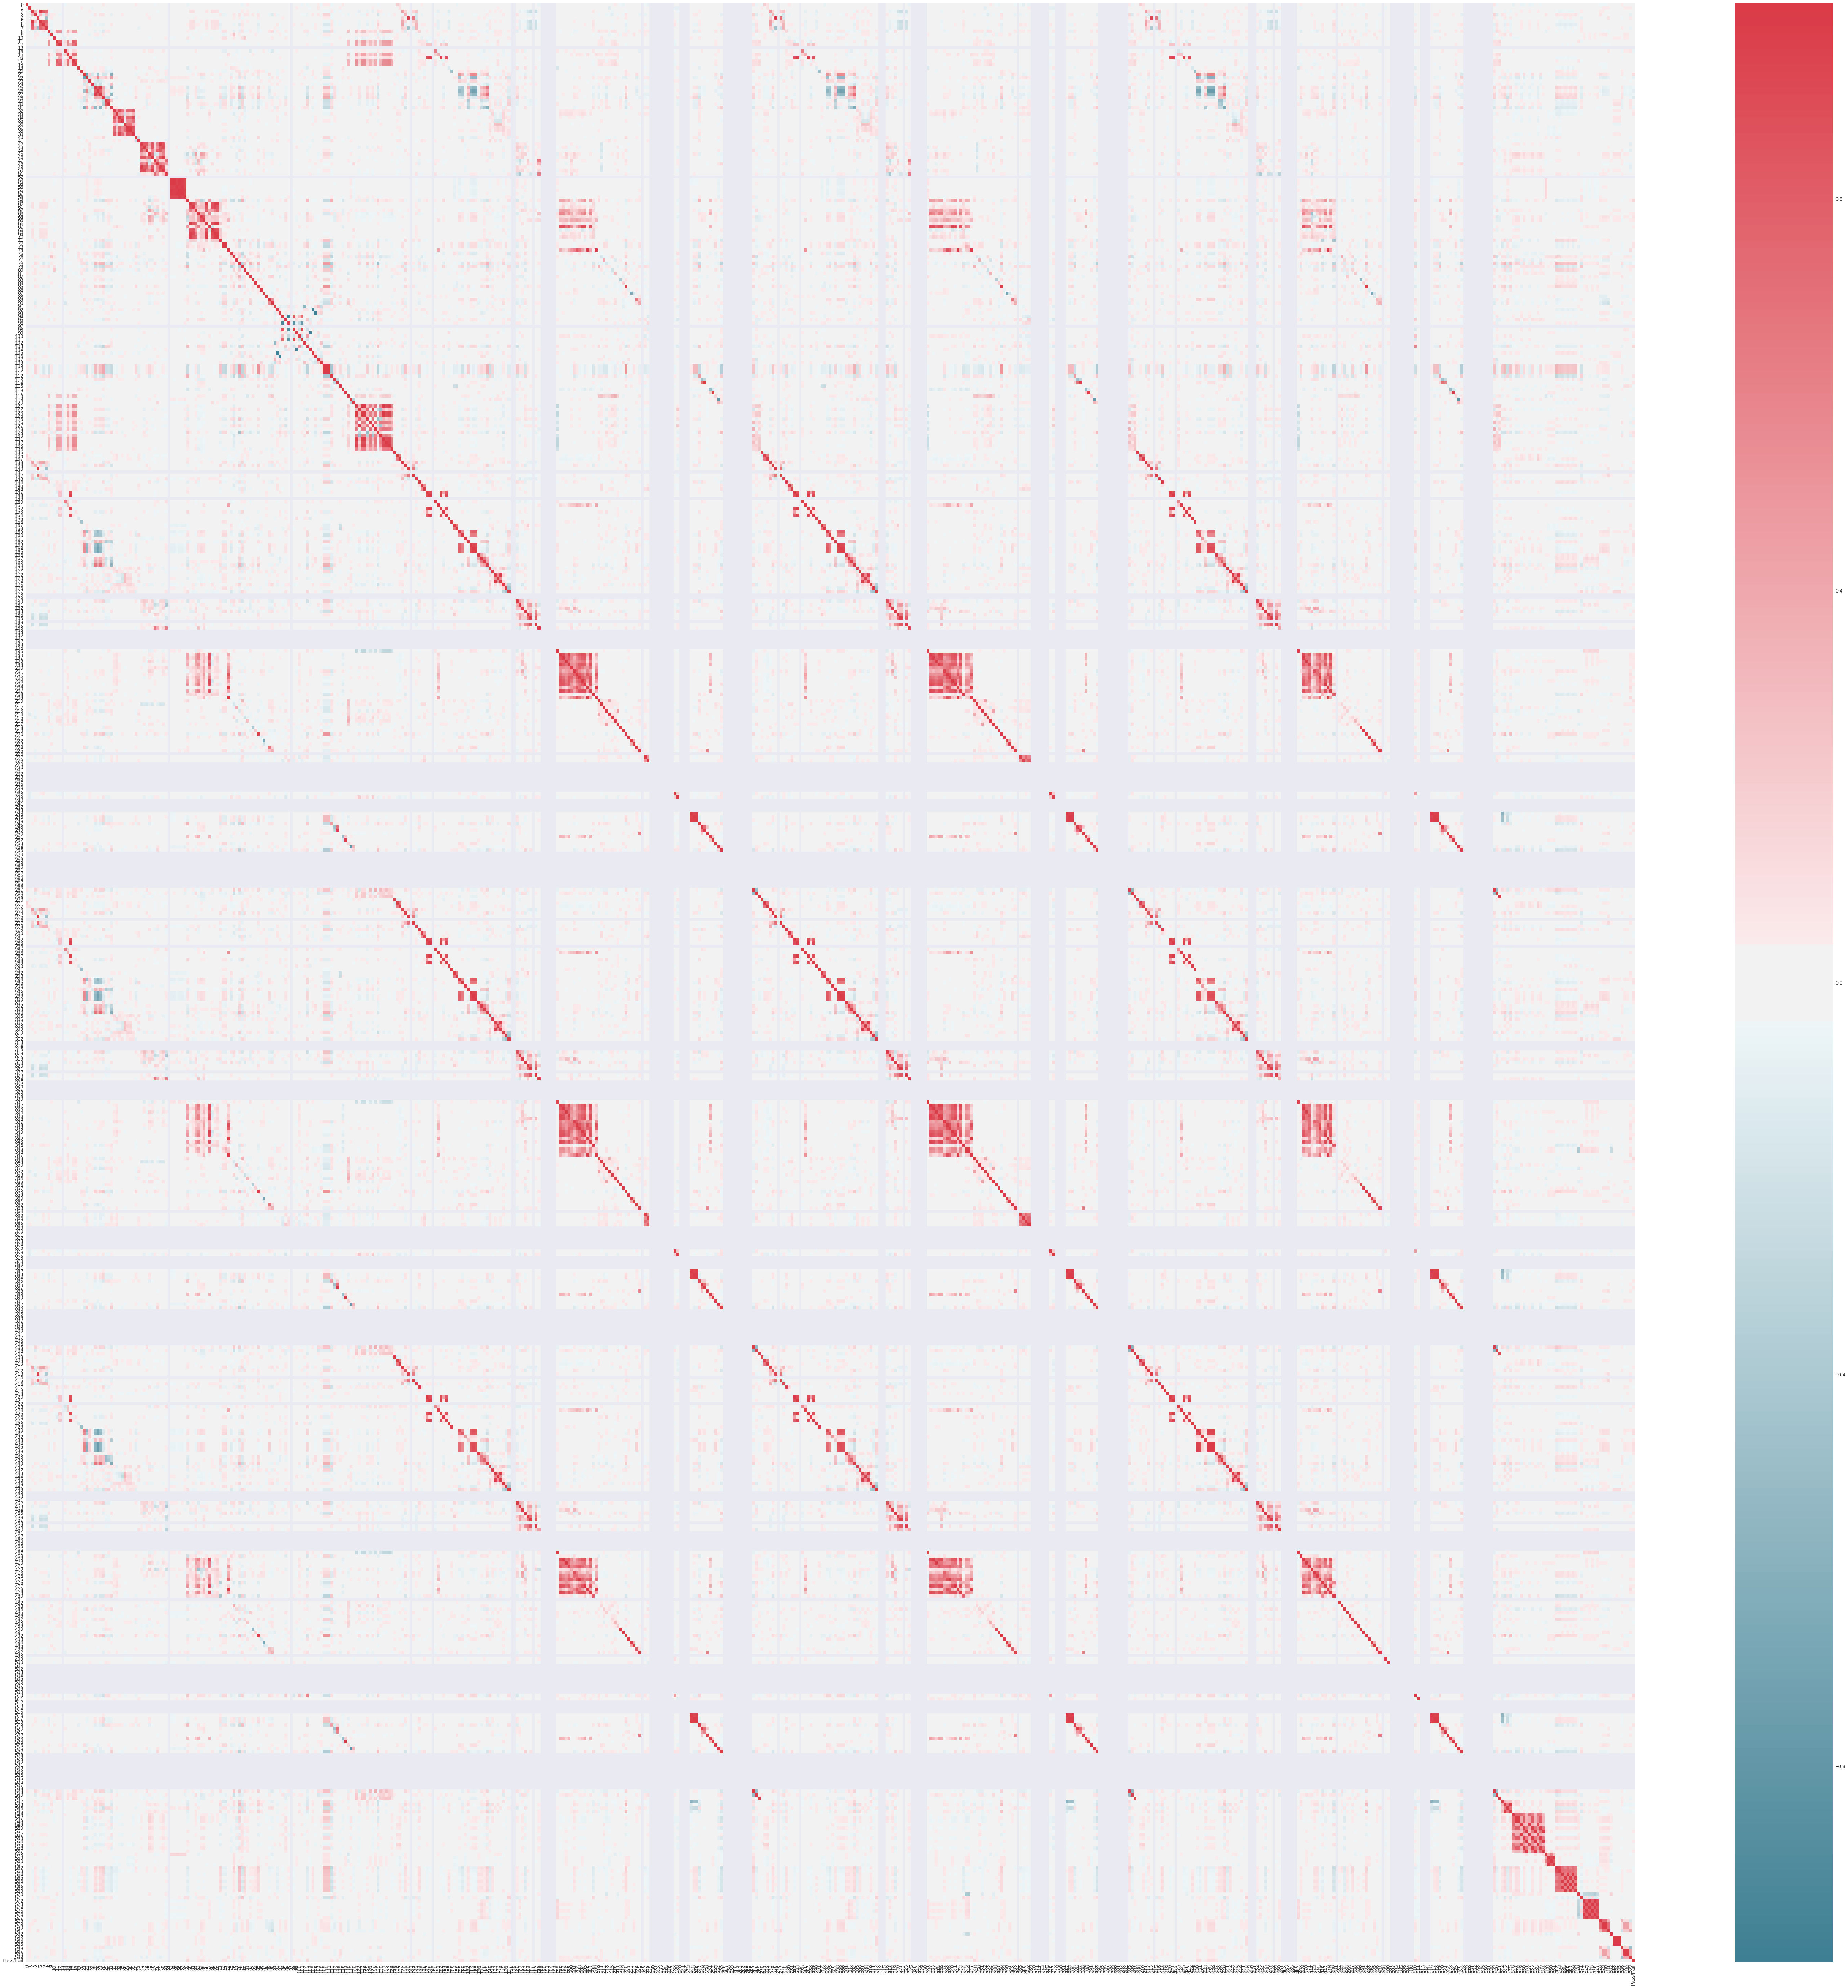

In [0]:
# Heatmap

fig, axis = plt.subplots(figsize = (100, 100))

corr = data.corr()

sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True), ax = axis)

**Data Pre-processing**

In [0]:
# deleting the first column

data = data.drop(columns = ['Time'], axis = 1)

data.shape

(1567, 591)

In [0]:
# separating the dependent and independent data

x = data.iloc[:,:590]
y = data.iloc[:, 590]

print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 590)
shape of y: (1567,)


In [0]:
# splitting them into train test and split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1253, 590)
shape of x_test:  (314, 590)
shape of y_train:  (1253,)
shape of y_test:  (314,)


In [0]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Before Sampling**

**Modelling without PCA**

**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy:  0.9888268156424581
Testing Accuarcy:  0.9585987261146497


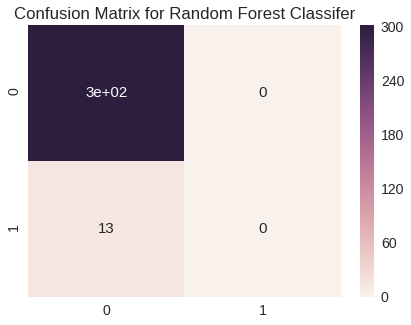

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Random Forest Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(1/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  7.6923076923076925 %


**Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.8853503184713376


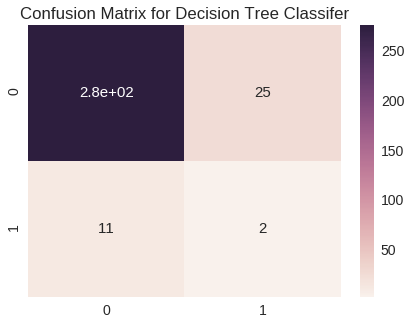

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(1/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  7.6923076923076925 %


**Support Vector Machines**

In [0]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training Accuracy:  0.9329608938547486
Testing Accuarcy:  0.9585987261146497


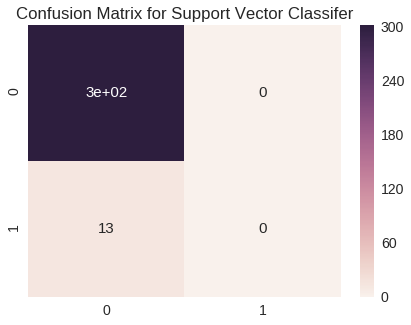

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Support Vector Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(0/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  0.0 %


**Naive Bayes Classifier**

In [0]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(var_smoothing = 5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.902633679169992
Testing Accuarcy:  0.9140127388535032


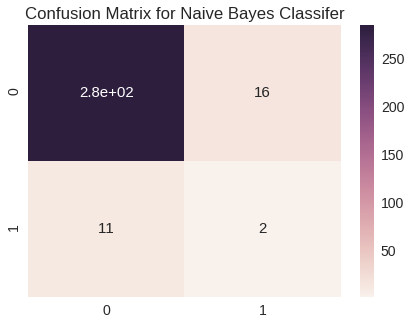

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Naive Bayes Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(2/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  15.384615384615385 %


**AdaBoost Classifier**

In [0]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.9792498004788508
Testing Accuarcy:  0.9363057324840764


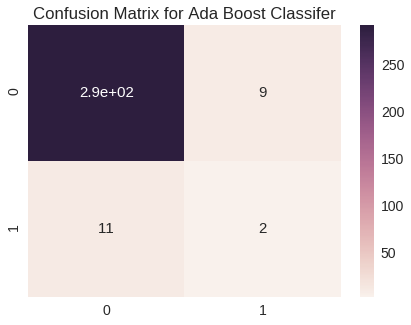

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Ada Boost Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(2/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  15.384615384615385 %


**Xg Boost**

In [0]:
from xgboost.sklearn import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.9992019154030327
Testing Accuarcy:  0.9585987261146497


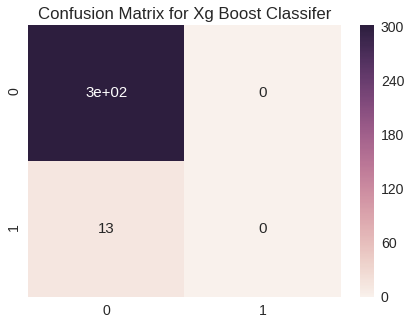

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Xg Boost Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(0/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  0.0 %


**K Nearest Neighbors**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.9297685554668795
Testing Accuarcy:  0.9585987261146497


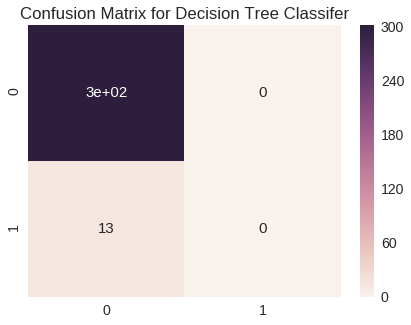

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(0/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  0.0 %


**Visualization of Classification v/s Anamoly Detection Accuracy**

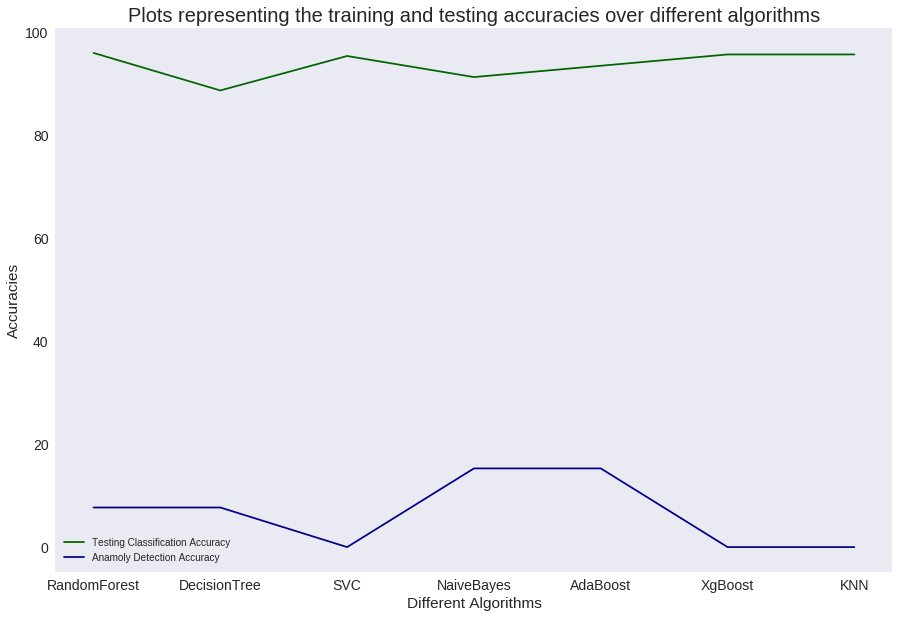

In [0]:
# plotting the train test results for all the 9 algorithms

test = [96.1, 88.8, 95.5, 91.4, 93.6, 95.8, 95.8]
anamoly = [7.7, 7.7, 0, 15.3, 15.3, 0, 0]

plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Plots representing the training and testing accuracies over different algorithms', fontsize = 20)
plt.plot(range(0, 7), test, c = 'darkgreen', )
plt.plot(range(0, 7), anamoly, c = 'darkblue',)
plt.xlabel('Different Algorithms')
plt.ylabel('Accuracies')
labels = "Testing Classification Accuracy", "Anamoly Detection Accuracy" 

n_groups = 7
index = np.arange(n_groups)

plt.xticks(index, ('RandomForest', 'DecisionTree', 'SVC', 'NaiveBayes', 'AdaBoost', 'XgBoost', 'KNN'))
plt.legend(labels, loc = 'best', fontsize = 10)
plt.show()

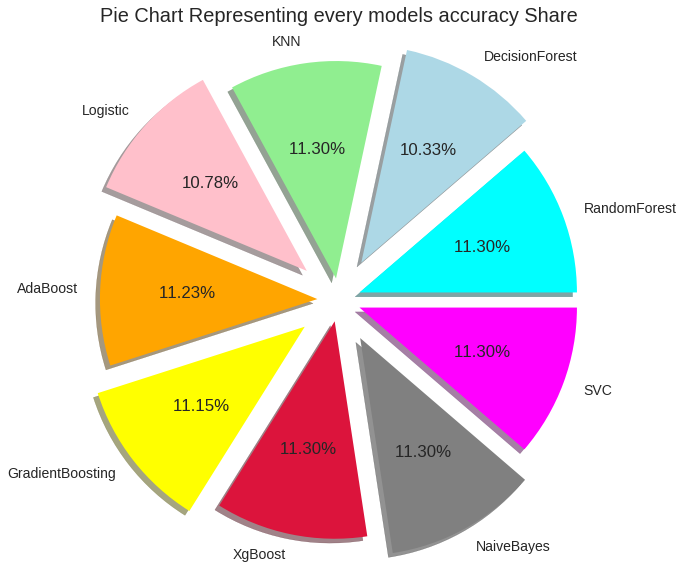

In [0]:
# visualizing each model's performance

labels = "RandomForest", "DecisionForest", "KNN", "Logistic", "AdaBoost", "GradientBoosting", "XgBoost", "NaiveBayes", "SVC"
# size corresponds to the test accuracies  of each model
size = [97.4, 89, 97.4, 92.9, 96.8, 96.1, 97.4, 97.4, 97.4]
colors = ['cyan', 'lightblue', 'lightgreen', 'pink', 'orange', 'yellow', 'crimson', 'gray', 'magenta']
explode = [0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1]

plt.rcParams['figure.figsize'] = (20, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%') 
plt.title('Pie Chart Representing every models accuracy Share', fontsize = 20)
plt.axis('off')
#plt.legend(labels, loc = 'upper right')
plt.show()

**After Sampling of the Dataset**

**Under-Sampling**

In [0]:
failed_tests = np.array(data[data['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

104


In [0]:
data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [0]:
normal_indices = data[data['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

1463


In [0]:
random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

104


In [0]:
under_sample = np.concatenate([failed_tests, random_normal_indices])
print(len(under_sample))

208


In [0]:
# creating the undersample data

undersample_data = data.iloc[under_sample, :]

In [0]:

# splitting the undersample dataset into x and y sets

x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail'] 
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

(208, 590)
(208, 1)


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(166, 590)
(166, 1)
(42, 590)
(42, 1)


In [0]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.9879518072289156
Testing Accuarcy:  0.6904761904761905


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


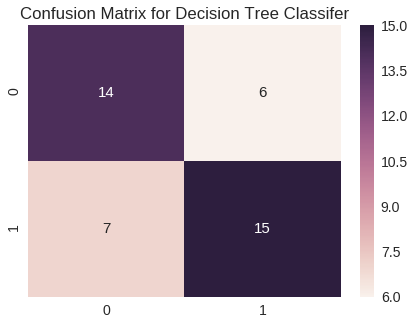

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

**Anamoly Detection Accuracy**

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(13/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  59.09090909090909 %


In [0]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.65 %


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.65')

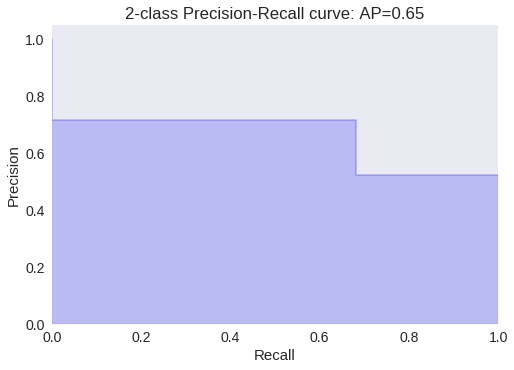

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

#plt.title('Precision Recall Curve for Xg Boost', fontsize = 25)
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(prc))


**Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.7380952380952381


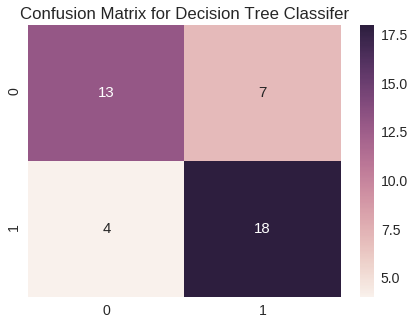

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(13/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  59.09090909090909 %


In [0]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.68 %


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.68')

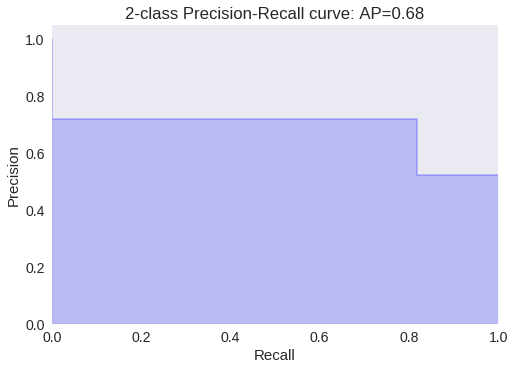

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

#plt.title('Precision Recall Curve for Xg Boost', fontsize = 25)
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(prc))

 **Xg- Boost Classifier**

In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(max_depth = 1)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Testing Accuracy: ", model.score(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy:  0.6190476190476191


In [0]:
# finding the AUPRC Score
# PR AUC is the area under the curve where x is recall and y is precision.

from sklearn.metrics import average_precision_score

probabilities = model.fit(x_train, y_train).predict_proba(x_test)
print('AUPRC = {}'.format(average_precision_score(y_test, probabilities[:, 1])))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUPRC = 0.7381836858661628


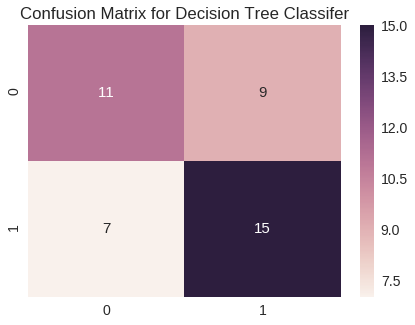

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(17/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  77.27272727272727 %


In [0]:
from sklearn.model_selection import learning_curve

weights = (y == 0).sum()/(1.0*(y == -1).sum())
trainSizes, trainScores, crossValScores = learning_curve(XGBClassifier(max_depth = 5, scale_pos_weights = weights, n_jobs = 4), 
                                                         x_train, y_train, scoring = 'average_precision')


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


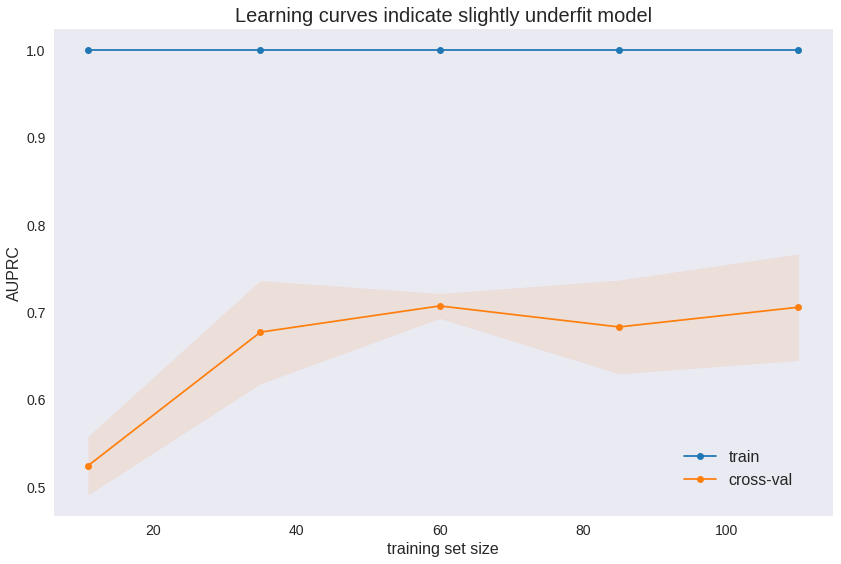

In [0]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd, trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd, crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])


plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16); 
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20);

**Comparison of Results Obtained by Under Sampling**

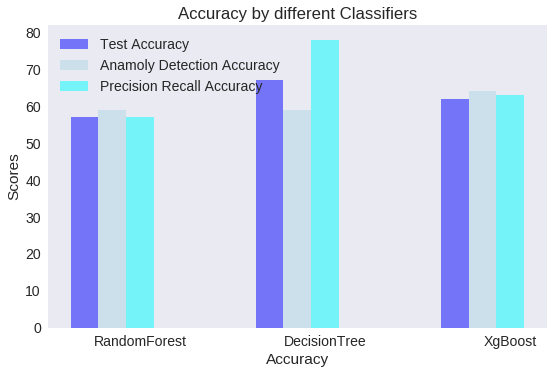

In [0]:
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
Test_Accuracy = (57, 67, 62 )
Anamoly_Detection_Accuracy = (59, 59, 64)
Precision_Recall_Accuracy = (57, 78, 63)

 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
 
rects1 = plt.bar(index, Test_Accuracy, bar_width, alpha = 0.5, color = 'blue', label = 'Test Accuracy')
rects2 = plt.bar(index + bar_width, Anamoly_Detection_Accuracy, bar_width, alpha = 0.5, color = 'lightblue', label = 'Anamoly Detection Accuracy')
rects3 = plt.bar(index + 2*bar_width, Precision_Recall_Accuracy, bar_width, alpha = 0.5 , color = 'cyan', label = 'Precision Recall Accuracy' )

plt.rcParams['figure.figsize'] = (15, 10)
plt.xlabel('Accuracy')
plt.ylabel('Scores')
plt.title('Accuracy by different Classifiers')
plt.xticks(index + 2*bar_width, ('RandomForest', 'DecisionTree', 'XgBoost'))
plt.legend()
plt.tight_layout()
plt.show()

**SMOTE(Over-Sampling) to treat the Anamoly Detection**

In [0]:
#!pip install -U imbalanced-learn

In [0]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_sample(x, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(224, 590)
(224,)


  We can see that the sizes of the x_resample and y_resample are same now, It is done by over sampling which means the class which was very less in number that is the fail class has now produced some replicated results to increase the size and hence to iradicate the problem of biasedness over the dataset in the classes of fail and pass.
  

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(166, 590)
(166, 1)
(42, 590)
(42, 1)


In [0]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.9879518072289156
Testing Accuarcy:  0.6428571428571429


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


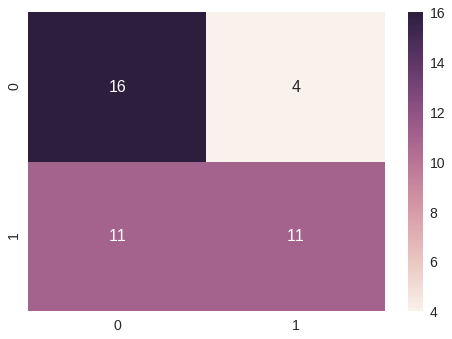

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(10/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  45.45454545454545 %


**Decision Tree Classifier**

In [0]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))
from sklearn.naive_bayes import GaussianNB

Training Accuracy:  1.0
Testing Accuracy:  0.6904761904761905


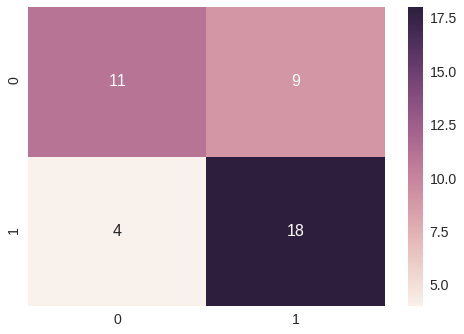

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(12/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  54.54545454545454 %


**K-Nearest Neighbors Classifiers**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.7228915662650602
Testing Accuracy : 0.47619047619047616


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


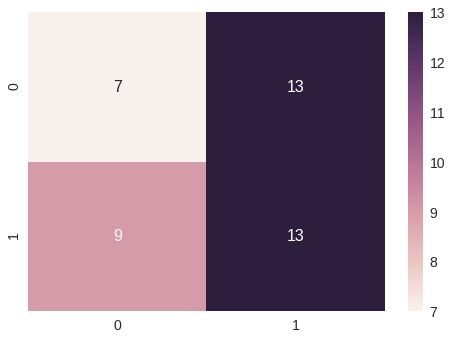

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(18/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  81.81818181818183 %


**Ada Boost Classifier**

In [0]:
from sklearn.ensemble import AdaBoostClassifier

model  = AdaBoostClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy : 1.0
Testing Accuracy : 0.6428571428571429


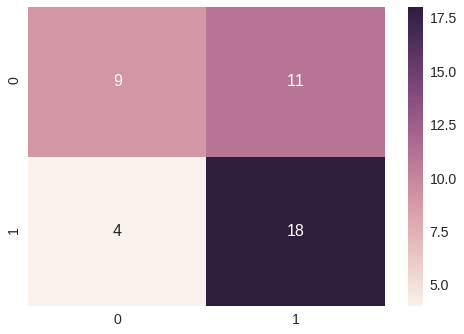

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(18/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  81.81818181818183 %


**Gradient Boosting Classifier**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

model  = GradientBoostingClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy : 1.0
Testing Accuracy : 0.6428571428571429


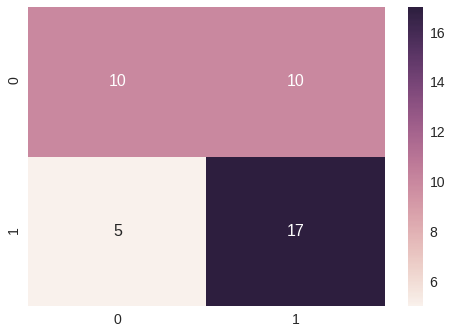

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(18/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  81.81818181818183 %


**Xg Boost Classifier**

In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selection of metric: Since the data is highly skewed, I use the area under the precision-recall curve (AUPRC) rather than the conventional area under the receiver operating characteristic (AUROC). This is because the AUPRC is more sensitive to differences between algorithms and their parameter settings rather than the AUROC 

**Hyper Parameter Tuning for Xg-Boost**

In [0]:
# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth' : [1, 10, 5, 7]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 2, n_jobs = -1)

grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.6204819277108434
Best Parameter:  {'max_depth': 1}


In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 1, scale_pos_weights = weights, n_jobs = 4)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy : 0.9457831325301205
Testing Accuracy : 0.6190476190476191


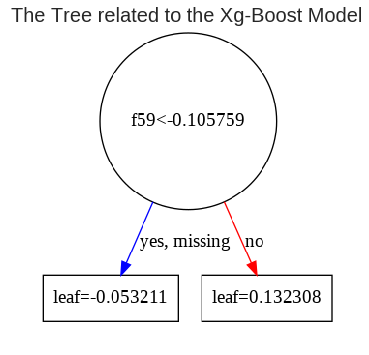

In [0]:
import matplotlib.pyplot as plt

xgb.plot_tree(model, num_trees = 0)

#plt.rcParams['figure.figsize'] = [10, 10]
plt.title('The Tree related to the Xg-Boost Model', fontsize = 20)
plt.show()

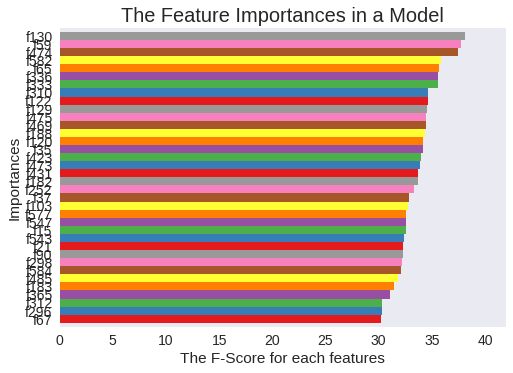

In [0]:
# plotting the feature importances

colors = plt.cm.Set1(np.linspace(0, 1, 9))
xgb.plot_importance(model, height = 1, color = colors, grid = False, importance_type = 'cover', show_values = False)

plt.rcParams['figure.figsize'] = (30, 40)
plt.title('The Feature Importances in a Model', fontsize = 20)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

From the above feature importance plot we can clearly see that one of the test labelled as test number 140 is highly important in determining a semiconductor test's overall result as pass or fail.

In [0]:
from sklearn.model_selection import learning_curve

weights = (y == 0).sum()/(1.0*(y == -1).sum())
trainSizes, trainScores, crossValScores = learning_curve(XGBClassifier(max_depth = 5, scale_pos_weights = weights, n_jobs = 4), 
                                                         x_train, y_train, scoring = 'average_precision')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


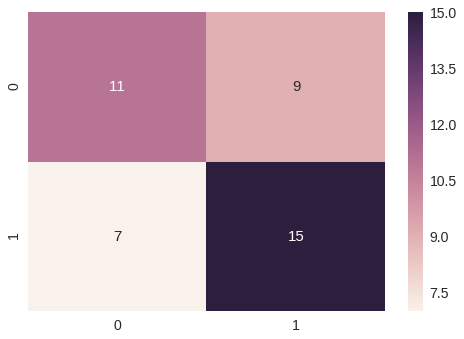

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(19/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  86.36363636363636 %


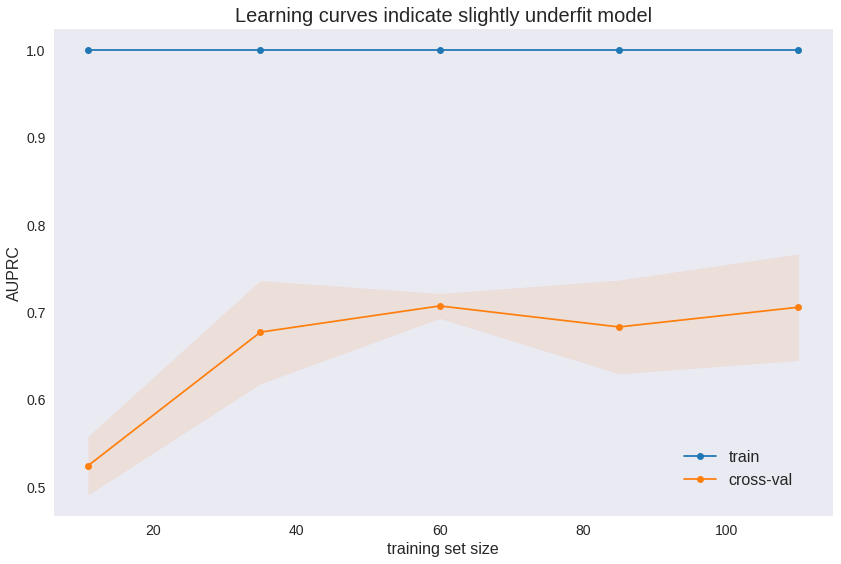

In [0]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd, trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd, crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])


plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16); 
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20);

In [0]:
from sklearn.metrics import average_precision_score

probabilities = model.fit(x_train, y_train).predict_proba(x_test)
print('AUPRC = {}'.format(average_precision_score(y_test, probabilities[:, 1])))

AUPRC = 0.7381836858661628


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Hyper-Parameter Tuning for Naive Bayes Classifier**

In [0]:
from sklearn.naive_bayes import GaussianNB

model  = GaussianNB()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.7048192771084337
Testing Accuracy : 0.6428571428571429


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'priors': [None], 'var_smoothing': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 2, n_jobs = -1)

grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.5
Best Parameter:  {'priors': None, 'var_smoothing': 1.0}


**It is a big Achievement that by using Grid Search CV (Hyper Parameter Tuning) we got such an amazing result that without parameters or by using the default parameters we were getting only 15% accuracy on the test set but now we are getting an whopping 93% accuracy on the test set which is very satisfiable**

In [0]:
from sklearn.naive_bayes import GaussianNB

model  = GaussianNB(priors = None, var_smoothing = 1.0)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.6204819277108434
Testing Accuracy : 0.6190476190476191


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


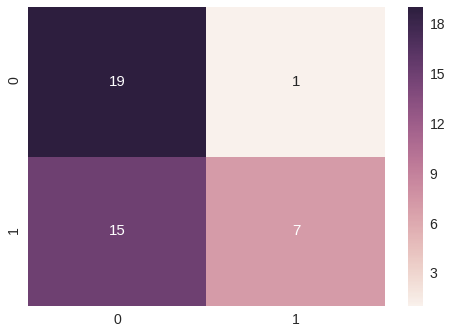

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(10/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  45.45454545454545 %


**Hyper Parameter Tuning for Support Vector Classifier**

In [0]:
from sklearn.svm import SVC

model  = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9578313253012049
Testing Accuracy : 0.6666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 0.1, 0.0001, 0.000001], 'kernel': ['linear', 'rbf'], 'gamma': [0.0000001, 0.0001, 0.001, 0.01]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           n_jobs = -1)


grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:

print("Best Accuracy: ", best_accuracy)
print("Best Parameters :", best_parameters)

Best Accuracy:  0.6204819277108434
Best Parameters : {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [0]:
from sklearn.svm import SVC

model  = SVC( C = 1, gamma = 0.001, kernel = 'rbf')

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9036144578313253
Testing Accuracy : 0.6904761904761905


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


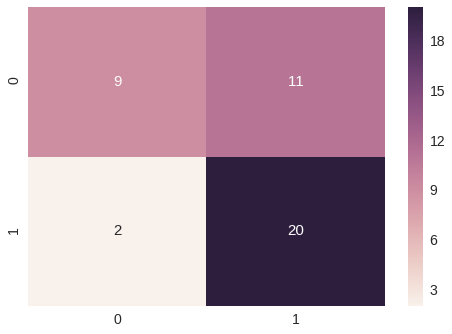

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [0]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(20/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  90.9090909090909 %


In [0]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.63 %


**As, there is no increase in the value of testing accuracy, that means the SVC works good for the default values.**

**Plotting**

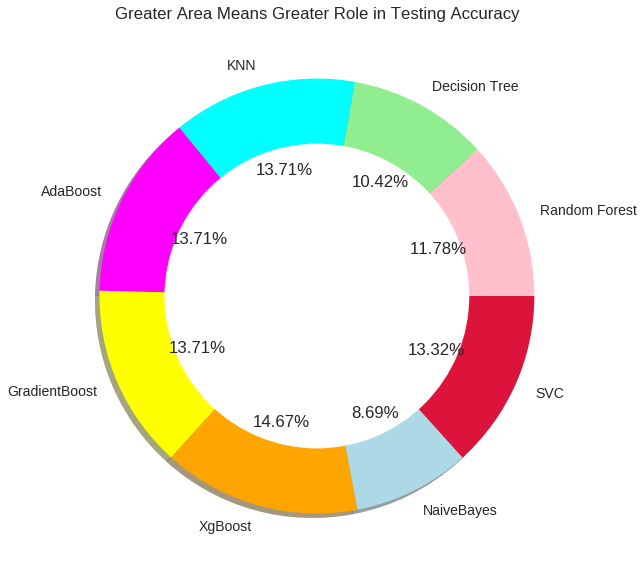

In [0]:
# defining the parameters for a pie chart

labels = "Random Forest", "Decision Tree", "KNN", "AdaBoost", "GradientBoost", "XgBoost", "NaiveBayes", "SVC"
size = [61, 54, 71, 71, 71, 76, 45, 69]
colors = ['pink', 'lightgreen', 'cyan', 'magenta', 'yellow', 'orange', 'lightblue', 'crimson', 'grey']

# Create a circle for the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Greater Area Means Greater Role in Testing Accuracy')
p = plt.gcf()
p.gca().add_artist(my_circle)
#plt.legend()
plt.show()

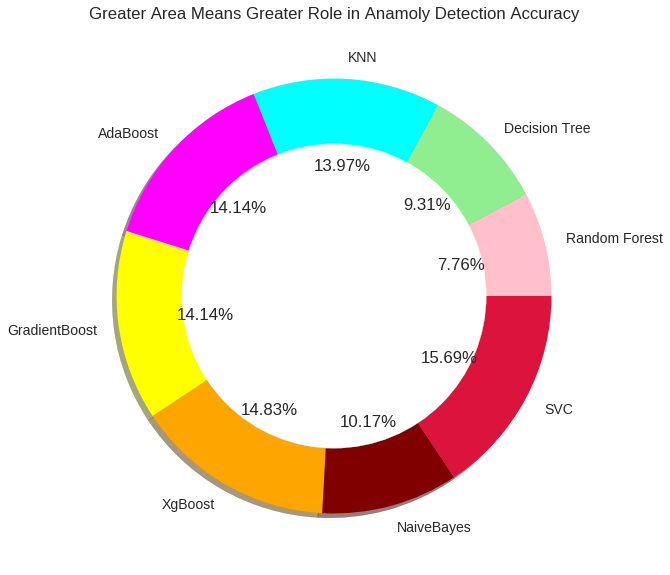

In [0]:
# defining the parameters for a pie chart

labels = "Random Forest", "Decision Tree", "KNN", "AdaBoost", "GradientBoost", "XgBoost", "NaiveBayes", "SVC"
size = [45, 54, 81, 82, 82, 86, 59, 91]
colors = ['pink', 'lightgreen', 'cyan', 'magenta', 'yellow', 'orange', 'maroon', 'crimson', 'lightblue']

# Create a circle for the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Greater Area Means Greater Role in Anamoly Detection Accuracy')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**Modelling with Dimensionality Reduction**

In [0]:
# Applying the Dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = None)
pca.fit(x_train)
print(pca.explained_variance_ratio_)



[7.32355629e-02 5.12528208e-02 3.47713756e-02 2.95078481e-02
 2.88944301e-02 2.75046235e-02 2.46449224e-02 2.41238365e-02
 2.30344082e-02 2.06858939e-02 1.94381057e-02 1.84503201e-02
 1.82393210e-02 1.74394349e-02 1.72838150e-02 1.63830786e-02
 1.57386916e-02 1.54348033e-02 1.51455503e-02 1.47334527e-02
 1.40246880e-02 1.32963589e-02 1.27094101e-02 1.24495004e-02
 1.19616559e-02 1.16727859e-02 1.14675094e-02 1.11115086e-02
 1.08663716e-02 1.06668246e-02 1.04042645e-02 9.96488654e-03
 9.66105591e-03 9.49669798e-03 9.11395488e-03 8.87876687e-03
 8.69912081e-03 8.56828871e-03 8.46194903e-03 8.18060613e-03
 8.04645340e-03 7.75159396e-03 7.55321792e-03 7.21529000e-03
 7.09476086e-03 6.91564595e-03 6.76978729e-03 6.58460165e-03
 6.49773030e-03 6.40933599e-03 6.04566222e-03 5.90778322e-03
 5.73817003e-03 5.60113891e-03 5.56133682e-03 5.49726655e-03
 5.28029090e-03 5.11282957e-03 5.04405991e-03 4.98056224e-03
 4.84310871e-03 4.72830518e-03 4.66572209e-03 4.49894697e-03
 4.35645963e-03 4.193769

After Applying PCA we can clearly see that we can perform Principal Component Analysis (Dimensionality Reduction because all the 590 attributes are not contributing in a big way to the result hence we can undermine the attributes which are less responsible to reach to the result, it will be helpgul for reducing the complexity as the number of columns  is very high.)

**Modelling with Top 28 attributes or components**

In [0]:
# Applying the Dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = 30)
pca.fit(x_train)
#print(pca.explained_variance_ratio_)


PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
from sklearn.svm import SVC

model  = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9578313253012049
Testing Accuracy : 0.6666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(max_depth = 1)

In [0]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.62 %


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.62')

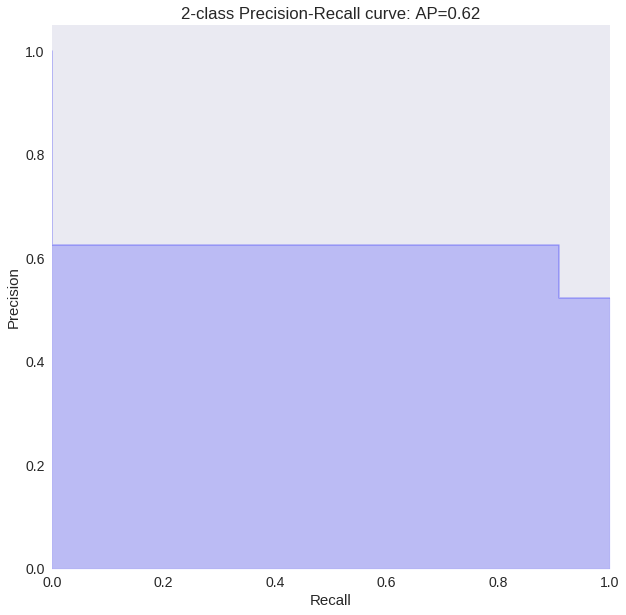

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

#plt.title('Precision Recall Curve for Xg Boost', fontsize = 25)
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(prc))
